# データアナリスト・アソシエイト実技試験（DataCamp）

## 会社の背景
ペットマインドはペット用品の小売店で、カリフォルニア州を拠点に置いているEコーマスサイトです。ペットマインドは高級品と日常品を組み合わせた製品を販売しています。 豪華なアイテムには、おもちゃ、日用品、食品も含まれます。昨年、より多くの日用品を繰り返し販売することで売上を増やしたいと考えていました。現在は、ピート商品の購入が売上にどのような影響を与えるかについてのレポートを調べて欲しいとの事です。

## お客様からの質問
1. データ内のクリーニング:
- a. 値が記述と一致するかどうかを調べてください。

- b. 列内の欠損値の数があるかを調べてください。

- c. 値が記述と一致しない場合、値を一致させるために何をしたかについて説明してください。

2. リピート購入している製品の数を示すビジュアライゼーションを作成してください。:
- a. どのカテゴリーが、リピート購入の商品が最も多く、観測値として現れるかを調べてください。

- b. カテゴリー間でのリピート購入の観察結果はバランスがとれているかどうかを説明しなさい。

3. ビジュアライゼーションを使い、すべての売上の分布を説明してください。

4. リピート購入商品と売上の関係について説明してください。 解答には、グラフを使い可視化させてください。

## モジュールのインポート

In [3]:
# データ可視化に必要なライブラリをインポート
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## テーブルのローディングとプレビュー

In [4]:
# CSVファイルをDataFrameに読み込む。
pet_supplies = pd.read_csv('pet_supplies_2212.csv')
# DataFrameの形状（行数と列数）を表示
print(pet_supplies.shape)
# 最初のいくつかの行をプレビュー・確認
pet_supplies.head()

(1500, 8)


,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


- A `pet_supplies` のデータフレームには 1500 行と 8 列が存在します。 
- A `pet_supplies` のデータフレームには product_id、category、animal、size、price、sales、raating、repeat_purchase の 8つの列が含まれています。

In [56]:
# pet_supplies データフレームの詳細な情報が表示
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


- A `pet_supplies` のデータフレームは合計7つの列から成り立っており、1500行のデータが含まれていることがわかります。 
- どの列からも欠損値はありません。
- データフレーム全体のメモリ使用量は約93.9KBです。

In [5]:
# DataFrame内の重複をチェック
pet_supplies.duplicated().sum()

0

In [6]:
# 空の値をチェック
pet_supplies.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

- データフレームに重複はありません。 ただし、`rating` に、150個の欠損値があります。

In [7]:
# それぞれの列からユニークな値を確認
print(len(pet_supplies['product_id'].unique()))
print(pet_supplies['category'].unique())
print(pet_supplies['animal'].unique())
print(pet_supplies['size'].unique())
print(pet_supplies['price'].unique()[:5])
print(pet_supplies['sales'].unique()[:5])
print(pet_supplies['rating'].unique())
print(pet_supplies['repeat_purchase'].unique())

1500
['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' '-']
['Bird' 'Dog' 'Cat' 'Fish']
['large' 'MEDIUM' 'medium' 'small' 'Small' 'Large' 'SMALL' 'Medium'
 'LARGE']
['51.1' '35.98' '31.23' '24.95' '26.18']
[1860.62  963.6   898.3   982.15  832.63]
[ 7.  6.  5.  4.  8.  1.  3. nan  2.  9.]
[1 0]


- `category`の列の中で分別できていない、'-' の値を発見。後に`Unknown`（不明）に変更する。
- `size`の列で、`large`、`miedium`、`small`が大文字、小文字が統一されていない。一つに集結する。
- `rating`の列の中で'nan' の値を発見。後に`0`に変更する。

In [30]:
# 数値データを確認するため、describeメソッドを使用し、'price'と'sales'の要約統計量を確認
print(pet_supplies['price'].describe())
print("-------------------")
print(pet_supplies['sales'].describe())

count    1500.000000
mean       29.288373
std         7.335749
min        12.850000
25%        25.000000
50%        28.065000
75%        33.142500
max        54.160000
Name: price, dtype: float64
-------------------
count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64


In [10]:
# salesの値を小数点以下2桁に丸める
rounded_sales = pet_supplies['sales'].round(2)

# 丸められた値と元の値を比較
is_rounded = rounded_sales == pet_supplies['sales']

# salesの値がすべて小数点以下2桁に丸められているか確認
if is_rounded.all():
    print("salesの値はすべて小数点以下2桁に丸められています。")
else:
    print("salesの値はすべて小数点以下2桁に丸められていません。")

salesの値はすべて小数点以下2桁に丸められています。


## 問題のなかったデータ
- `product_id` 列は問題なく、欠損値もありません。 
- `animal` 列は問題なく、欠損値もありません。 
- `sales` 列は問題なく、欠損値もありません。  
- `repeat_purchase`列は問題なく、欠損値もありません。 

## 問題あるデータ

- `category` 列を修正する必要があります。 未分類の値がある場合、これらの値は「Unknown」に置き換える必要です。
- `size` 列を修正する必要があります。 単語に大文字を使うものと使わないものがあります。 これらの値は一貫している必要があります。
- `price` 列を修正する必要があります。 「unlisted」と呼ばれる値があります。 これらの値を中央価格にする必要があります。
- `rating` 列を修正する必要があります。 欠損値があるので、0 に置き換える必要があります。



## データクリーニング開始

問題 #1 `category`: 未分類の値「'-'」は「Unknown」に置き換える。

In [14]:
# カテゴリ列のすべての「-」値を「Unknown」に変更します
pet_supplies.category =  pet_supplies.category.replace('-', 'Unknown')

### テスト

In [15]:
print(pet_supplies.category.unique())

['Food' 'Housing' 'Medicine' 'Toys' 'Equipment' 'Accessory' 'Unknown']


問題 #2 `size`: すべての値は小文字に変更

In [16]:
# サイズ列の値はすべて小文字に変更します。
pet_supplies["size"] = pet_supplies['size'].str.lower()

### テスト

In [17]:
pet_supplies["size"].unique()

array(['large', 'medium', 'small'], dtype=object)

問題 #3 `price`: 値、’unlisted’ はすべて中央価格に置き換える。

In [18]:
# 「unlisted」を NaN に置き換え、価格を数値 dtype に変換します
pet_supplies['price'] = pd.to_numeric(pet_supplies['price'].replace('unlisted', np.nan))

# 価格の中央値を計算し、NaN 値を中央値に置き換えます
median_price = pet_supplies['price'].median()
pet_supplies['price'] = pet_supplies['price'].fillna(median_price)

### テスト

In [19]:
# NaN値が中央値に置き換えられたかどうかの確認
display(pet_supplies['price'].describe())
print("-------------------")
pet_supplies['price'].head()

count    1500.000000
mean       29.288373
std         7.335749
min        12.850000
25%        25.000000
50%        28.065000
75%        33.142500
max        54.160000
Name: price, dtype: float64

-------------------


0    51.10
1    35.98
2    31.23
3    24.95
4    26.18
Name: price, dtype: float64

問題 #4 `rating`: nan を0に置き換えが必要。

In [20]:
# "nan"を0に置き換えます
pet_supplies['rating'] = pet_supplies['rating'].replace(np.nan, 0)

### テスト

In [21]:
# "nan"が0に置き換えられたかどうかを確認
pet_supplies['rating'].unique()

array([7., 6., 5., 4., 8., 1., 3., 0., 2., 9.])

In [23]:
# 更新およびクリーンアップされたデータを確認
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 93.9+ KB


## データ検証（データバリデーション）
値が記述と一致しない場合に、値を一致させるために何をしたかについてを説明致します。

### データの説明
データには8列、1500行があり、データに重複は見つかりませんでした。記述と値を一致させるために、各列に以下の変更を加えました。

1. `product_id` には記述通り、1500個のユニークな値があり、何も手を加えていません。
2. `category`列の値は変更しました。 「-」の値は「"Unknown"」に置き換えました。
3. `animal` 列には記述どおりの4つの値が含まれていました。何も手を加えていません。
4. `size`列の値を変更しました。 すべての値を小文字にしました。
5. `price` 列の値を変更しました。 欠損値は全体の中央値に置き換えました。
6. `sales` 列には、記述通り、小数点第2位に四捨五入された正の値のみが含まれてました。何も手を加えていません。
7. `rating` 列の値は変更されました。 欠損値は0に置き換えました。
8. `repeat_purchase` 列には記述通り1と0の値のみが含まれていました。何も手を加えていません。

## データ可視化（ビジュアライゼーション）の作成


1. どのカテゴリーが、リピート購入の商品が最も多く、観測値として現れるかを調べなさい。
2. カテゴリー間でのリピート購入の観察結果はバランスがとれているかどうかを説明しなさい。

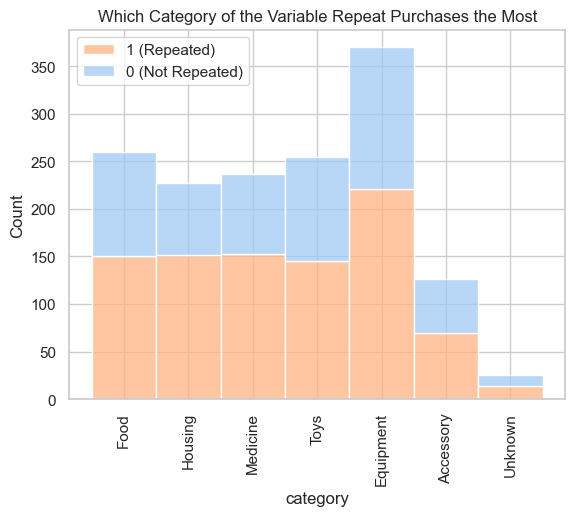

In [31]:
# 可視化する背景を設定
sns.set_theme(style="whitegrid", palette="pastel")

# 積み上げ棒グラフを作成
sns.histplot(data= pet_supplies, x="category", hue="repeat_purchase", multiple="stack")
plt.xticks(rotation=90)

# どのカテゴリーでリピートの商品が最も多く観測されたか
plt.title("Which Category of the Variable Repeat Purchases the Most")
plt.legend(labels = ['1 (Repeated)','0 (Not Repeated)',])
plt.show()

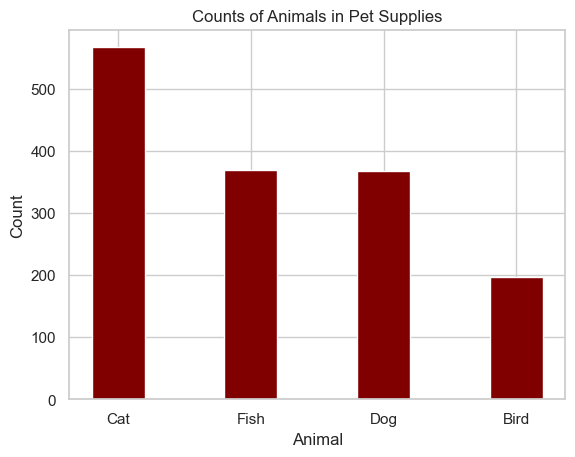

In [48]:
# 'animal' 変数内のユニークな値の数をカウント
animal_counts = pet_supplies['animal'].value_counts()

# 棒グラフを作成
plt.bar(animal_counts.index, animal_counts.values, color='maroon', width=0.4)

# ラベルとタイトルを追加
plt.xlabel('Animal')
plt.ylabel('Count')

# 動物別でのペット用品の数の違い
plt.title('Counts of Animals in Pet Supplies')

# グラフを表示
plt.show()

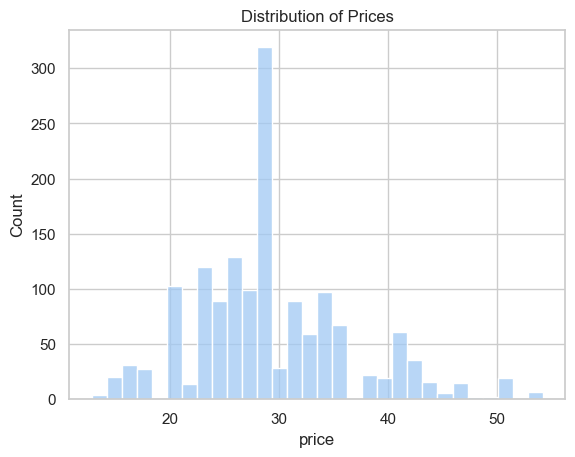

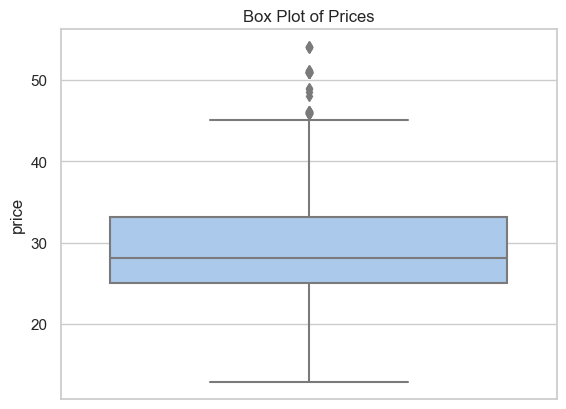

In [29]:
#'price'変数のヒストグラムを作成
sns.histplot(data=pet_supplies, x='price')

# タイトル『値段の分布の様子』
plt.title('Distribution of Prices')

# ヒストグラムを表示
plt.show()

#'price'変数の箱ひげ図を作成
sns.boxplot(data=pet_supplies, y='price')
plt.title('Box Plot of Prices')

# 箱ひげ図を表示
plt.show()

### 上記グラフの説明
データ可視化後の報告ですが、リピート購入商品は基本的に、カテゴリー全体で見てバランスが取れていますが、詳細な説明は以下に致します。
1.  最初のグラフから、顧客が最も多くリピート購入しているのは「装備品」アイテムであることがわかります。
2.  最初のグラフから、「食品」、「住宅」、「薬」、「おもちゃ」は、リピート購入の関係において比較的類似した結果を示していることがわかります。 
3.  上から2番目のグラフから、最も売っているアイテムは猫関連の商品であり、最も売っていない商品は鳥関連のアイテムであることがわかります。
4.  下から2番目、そして最後のグラフから、この店の平均価格は約30ドルであることがわかります。

## グラフ（ビジュアライゼーション）を使い、売上の分布を説明

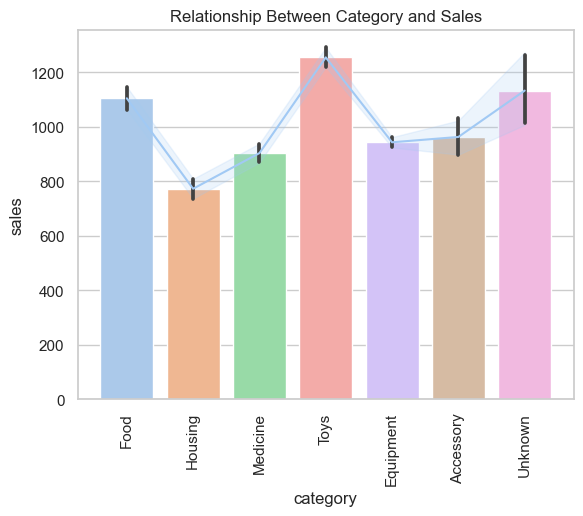

In [34]:
# カテゴリと売上の棒グラフを作成  
sns.barplot(data=pet_supplies, x="category", y="sales")
plt.title("Relationship Between Category and Sales")
plt.xticks(rotation=90)

# 折れ線プロットを追加
sns.lineplot(data=pet_supplies, x="category", y="sales", sort=False)

# グラフを表示
plt.show()

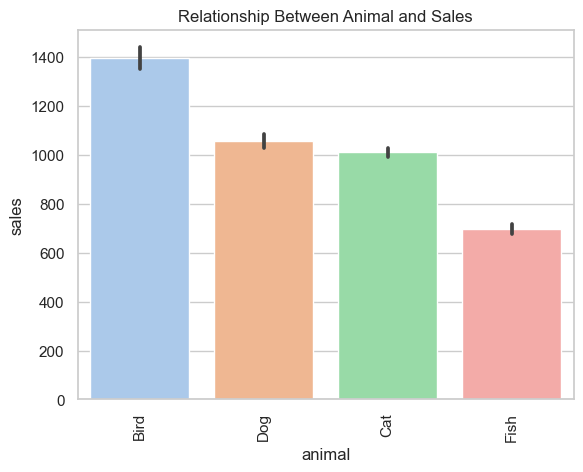

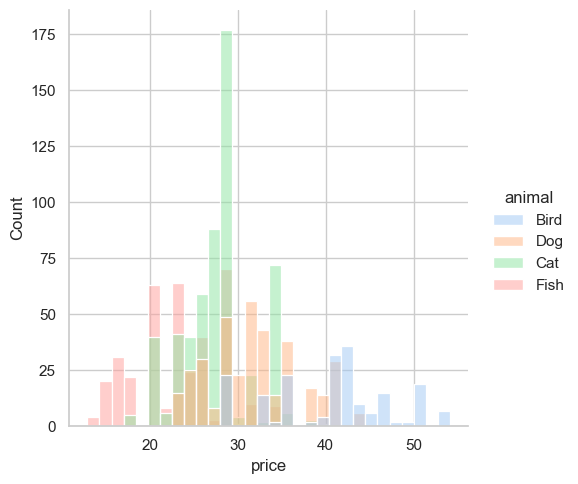

In [42]:
#「動物別と販売売上の関係」を棒グラフで作成
sns.barplot(data=pet_supplies, x="animal", y="sales")
plt.title("Relationship Between Animal and Sales")
plt.xticks(rotation=90)

# 下にヒストグラムを追加
sns.displot(data=pet_supplies, x="price", hue="animal")

# グラフを表示
plt.show()

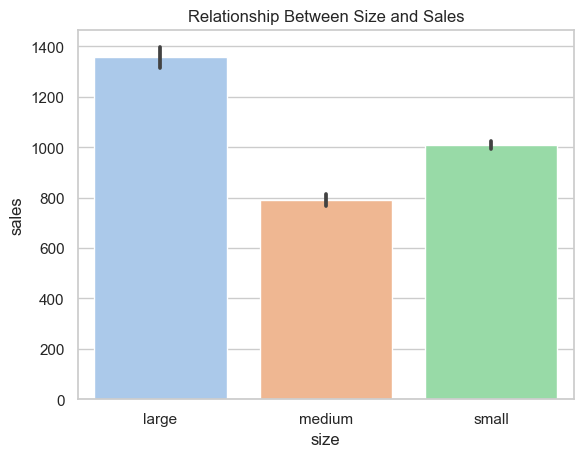

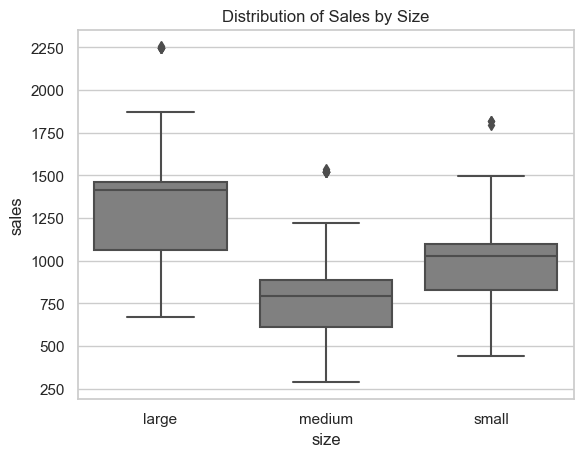

In [76]:
# 「サイズ別と販売売上の関係」を棒グラフで作成
sns.barplot(data=pet_supplies, x="size", y="sales")
plt.title("Relationship Between Size and Sales")
plt.show()

# 下にサイズ別での売上を分布化した箱ひげ図を作成
sns.boxplot(data=pet_supplies, x="size", y="sales", color="gray", saturation=0.5)
plt.title("Distribution of Sales by Size")
plt.show()

## 上記グラフの説明
全売上の分布を可視化しました。 詳細な説明は以下にあります。
1. 最初のグラフから、「食品」と「おもちゃ」が最も売れているカテゴリであることがわかります。 
2. 2番目のグラフから、昨年「Bird」製品が最も売れたことが分かります。「Bird」製品は「Fish」製品に比べて 2 倍売れました。
3. 最後のグラフから、昨年は「大型」製品がよく売れたことがわかります。「中型」製品は最も売れていません。 

## 売上の分布を可視化してみて企業（ペットマインド様）への提案

上記のグラフに基づいて、昨年は「Bird」製品、特に大型のアイテムが売上に貢献したことがわかりました。ですが、鳥製品の展示が犬、猫の商品と比較すると一番少なくなっている現状がございます。鳥製品の商品の一つあたりの値段も高いため、昨年の売上に貢献した事がわかります。ですので、鳥製品で、総合的にも売れているおもちゃ、食品カテゴリーを展示すれば、翌年の売上に大きく貢献してくれる可能性が非常に高いです。

## リピート購入・非リピート購入の平均評価の可視化

来年以降の商品展示において大切な指標になる「リピート購入と評価の関係」を表します。

repeat_purchase
0    4.575758
1    4.437086
Name: rating, dtype: float64

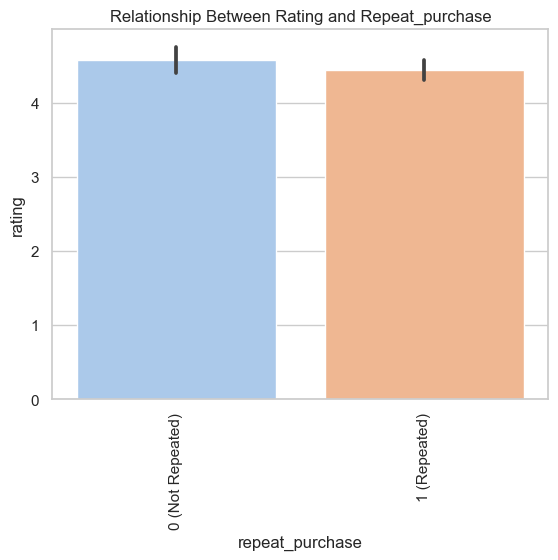

In [77]:
# リピート購入・非リピート購入の平均評価を確認
display(pet_supplies["rating"].groupby(pet_supplies["repeat_purchase"]).mean())

# リピート購入と評価の棒グラフを作成
sns.barplot(data=pet_supplies, x="repeat_purchase", y="rating")

#ラベルを設定
labels = ['1 (Repeated)','0 (Not Repeated)',]

#リピート購入と平均評価の関係
plt.title("Relationship Between Rating and Repeat_purchase")
plt.xticks(ticks=[1, 0], labels=labels, rotation=90)
plt.show()

### 上記のグラフ説明

・「非リピート商品」は、リピート商品よりも高い評価を得ていました。ですので、リピート商品の販売を品切れにしない事も大切ですが、総合的に見て、ほぼ評価の差がないので、積極的に新しい商品を導入し、顧客に購買意欲を掻き立てるのが肝心になっていきます。

## リピート購入と売上の関係について説明


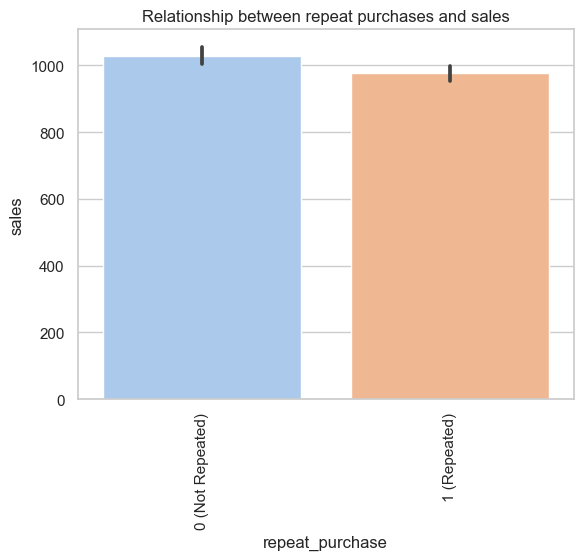

In [78]:
# リピート購入と売上の棒グラフを作成
sns.barplot(data=pet_supplies, x="repeat_purchase", y="sales")

# ラベルを作成
labels = ['1 (Repeated)','0 (Not Repeated)',]

plt.title("Relationship between repeat purchases and sales")
plt.xticks(ticks=[1, 0], labels=labels, rotation=90)
plt.show()



### 上記の関係をより理解するための追加グラフ。

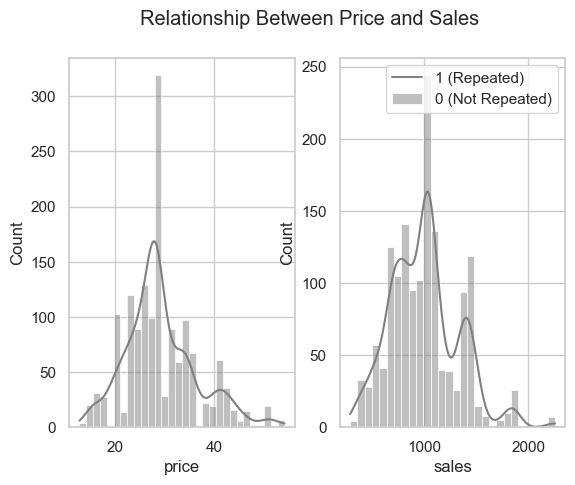

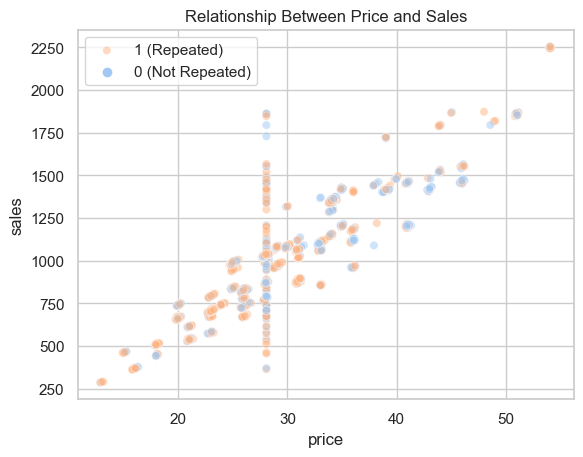

In [49]:
# 価格変数のヒストグラムを追加
plt.subplot(1, 2, 1)
sns.histplot(data=pet_supplies, x="price", color="gray", kde=True)

# 売上変数のヒストグラムを追加
plt.subplot(1, 2, 2)
sns.histplot(data=pet_supplies, x="sales", color="gray", kde=True)

# プロットのタイトルを設定する
plt.suptitle("Relationship Between Price and Sales")
plt.legend(labels = ['1 (Repeated)','0 (Not Repeated)'])

# 上記のプロットを表示
plt.show()

# 価格と売上の散布図を作成
sns.scatterplot(data=pet_supplies, x="price", y="sales", hue="repeat_purchase", alpha=0.5)

plt.title("Relationship Between Price and Sales")
plt.legend(labels = ['1 (Repeated)','0 (Not Repeated)',])

# 下記のプロットを表示
plt.show()

### 説明
リピート購入と販売の関係は、2つの視覚化によって説明されます。 詳細な説明は以下にあります。

1. 最初のグラフから、リピート商品と非リピート商品の昨年の売上パターンがほぼ同じであることがわかります。

2. 2番目の視覚化から、リピート商品と非リピート商品の「売上」と「価格」の関係は、グラフ上でほぼ同一です。 グラフの中央の縦の点は、中央価格に置き換えられた「unlisted value 」の値を表します。

### まとめ（最終提案）
リピート購入と販売の関係ですが、リピート商品とリピート購入商品の昨年の売上はほぼ同じであるため、既存商品に守ることよりも、顧客が見たことのない真新しい商品の導入が来季は肝になってきます。その中で特に商品の導入に力を入れた方がいいのは、鳥の製品です。鳥の製品は一つあたりの値段が高く、今季の売上に大きく貢献した事がわかります。ですが、今季、鳥製品の展示品の数は他の動物と比べて最下位でした。来季は鳥製品の導入を検討する事を強くお勧めします。尚且つ、サイズ別で、売上を伸ばしたのは大型の商品、カテゴリー別で売上を伸ばしたのは、器具類、おもちゃ類でした。総合的に売れているおもちゃ類、食品類、器具類の既存商品はキープする事を推奨致します。翌年の売上を大きくするためには、動物別では「鳥商品」を、カテゴリー別では「おもちゃ商品」、「器具商品」を、そしてサイズ別では「大型商品」に力を入れれば、来季の売上高は今季を上回る可能性が非常に高いと推測できます。
